<a href="https://colab.research.google.com/github/pbhatt48/python_bootcamp/blob/master/DuolingoI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report,confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn import metrics 
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot
from sklearn.model_selection import learning_curve 
from sklearn.model_selection import KFold
from sklearn.metrics import explained_variance_score, make_scorer
from sklearn.model_selection import GridSearchCV
from sklearn import metrics, preprocessing, tree
from sklearn.metrics import f1_score, make_scorer, accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.model_selection import validation_curve
import time

import random
np.random.seed(42)
# random_state =42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
survey_data = "/content/drive/My Drive/Colab Notebooks/Duolingo/survey_data.csv"
survey_users_app_usage = "/content/drive/My Drive/Colab Notebooks/Duolingo/survey_users_app_usage.csv"

In [ ]:
# df_sd = pd.read_csv(survey_data, index_col=0, na_values='NA')
# df_su = pd.read_csv(survey_users_app_usage, index_col=0, na_values='NA')
df_sd = pd.read_csv(survey_data,  na_values='NA')
df_su = pd.read_csv(survey_users_app_usage, na_values='NA')
df_sd.head(10)

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds
0,35c9fc6e72c911e99681dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Stories/novels/children's books,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I like to learn new languages,"I want to learn as many languages as I can,Oth...",Advanced,Not currently a student,1,193
1,35c9fdde72c911e98630dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed full-time,Yes,Male,NaN,I'm slightly committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am a refugee",Intermediate,Not currently a student,1,139
2,35c9feb072c911e9ab4cdca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I want to connect with my heritage or identity,NaN,Beginner,Not currently a student,1,119
3,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229
4,35ca002672c911e99effdca9049399ef,35 - 54,"$76,000 - $150,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,NaN,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to connect with my heritage or identity,NaN,Intermediate,Not currently a student,1,157
5,35ca00d772c911e992e8dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed part-time,Yes,Male,Other apps,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time playing games,Intermediate,Part-time student,1,234
6,35ca018c72c911e9a63cdca9049399ef,Under 18,"$0 - $10,000",JP,Android phone or tablet,"No, I have never paid for Duolingo Plus",Daily,Unemployed,Yes,Female,Textbooks,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to challenge myself,NaN,Beginner,Full-time student,1,365
7,35ca023572c911e99fa5dca9049399ef,18-34,"$26,000 - $75,000",JP,Android phone or tablet,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want my family to learn a language together,NaN,Beginner,Not currently a student,1,182
8,35ca02de72c911e9a3bfdca9049399ef,18-34,"$76,000 - $150,000",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,No,Male,NaN,I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I like to learn new languages,It's been a lifelong goal to learn this langua...,Advanced,Not currently a student,1,197
9,35ca038a72c911e9bc47dca9049399ef,35 - 54,NaN,JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Monthly,Employed full-time,No,Female,"Textbooks,Speak with others (language events, ...",I'm very committed to learning this language.,I am using Duoling

In [ ]:
df_su.head()

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35cb7e8f72c911e9888edca9049399ef,6/20/18 21:14,NaN,46.0,True,False,277.0,88,741.0,668.0,135,137
1,35ca34fd72c911e99ed6dca9049399ef,8/8/17 5:01,NaN,50.0,True,False,62.0,16,57.0,57.0,6,453
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481
3,35d4beb072c911e9aa92dca9049399ef,10/5/18 9:28,NaN,2.0,False,False,2.0,3,6.0,5.0,1,30
4,35ccf4bd72c911e9be2edca9049399ef,9/17/15 3:16,NaN,34.0,False,False,216.0,57,338.0,297.0,56,1144


In [ ]:
df_su = df_su.dropna()
df_sd = df_sd.dropna()

In [ ]:
df_sd.index

Int64Index([   0,    3,    5,   10,   12,   16,   19,   27,   34,   36,
            ...
            6166, 6167, 6168, 6170, 6173, 6174, 6177, 6178, 6181, 6184],
           dtype='int64', length=2280)

In [ ]:
df_su.index

Int64Index([   2,    5,    6,    8,    9,   10,   12,   14,   18,   22,
            ...
            6123, 6124, 6126, 6129, 6130, 6139, 6141, 6143, 6144, 6147],
           dtype='int64', length=2625)

In [ ]:
len(set(df_sd.index)), len(df_sd.index)

(2280, 2280)

In [ ]:
len(set(df_su.index)), len(df_su.index)

(2625, 2625)

In [ ]:
common = set(df_sd.index).intersection(df_su.index)
len(common)

979

In [ ]:
len(df_su.index), len(set(df_su.index))

(2625, 2625)

In [ ]:
df_su.drop_duplicates(subset ="user_id",
                     keep = 'first' , inplace = True)

In [ ]:
df_su

,user_id,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
2,35d1a54a72c911e98e25dca9049399ef,10/15/14 17:55,1.0,71.0,False,False,202.0,29,315.0,295.0,55,1481
5,35ce7c1c72c911e9b0e4dca9049399ef,10/6/18 10:34,30.0,9.0,False,True,46.0,28,305.0,292.0,13,29
6,35d540eb72c911e9af04dca9049399ef,7/26/13 20:53,1.0,64.0,False,False,299.0,46,62.0,62.0,1228,1927
8,35d0286372c911e98aa2dca9049399ef,3/23/16 7:50,50.0,32.0,False,False,184.0,90,382.0,359.0,187,956
9,35cad8bd72c911e99f09dca9049399ef,1/17/18 22:39,30.0,21.0,True,True,144.0,65,601.0,552.0,47,291
...,...,...,...,...,...,...,...,...,...,...,...,...
6139,35ccd69e72c911e9bef6dca9049399ef,9/22/18 2:44,20.0,-5.0,False,False,139.0,42,487.0,424.0,38,43
6141,35cd18ca72c911e9b654dca9049399ef,5/5/18 19:28,20.0,-10.0,True,False,144.0,93,285.0,277.0,83,183
6143,35d4f80772c911e98416dca9049399ef,9/15/18 10:37,50.0,-6.0,False,False,75.0,50,502.0,429.0,22,50
6144,35cc559972c911e9a65ddca9049399ef,4/9/16 14:15,20.0,-5.0,False,False,17.0,9,74.0,73.0,3,939


In [ ]:
print(len(set(df_sd.user_id)), len(df_sd.user_id))
df_sd.drop_duplicates(subset ="user_id",
                     keep = 'first' , inplace = True)
print(len(df_sd.user_id))

2275 2280
2275


In [ ]:
common = set(df_sd.user_id).intersection(df_su.user_id)
len(common)

931

In [ ]:
merged_df = pd.merge(df_sd, df_su, on=["user_id"])
merged_df


,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,7/10/18 23:19,20.0,11.0,False,True,55.0,93,1161.0,1028.0,40,117
1,35ca00d772c911e992e8dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed part-time,Yes,Male,Other apps,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time playing games,Intermediate,Part-time student,1,234,11/13/17 17:43,20.0,10.0,False,False,19.0,9,20.0,8.0,2,356
2,35ca043572c911e9bd63dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,265,8/6/13 21:15,20.0,58.0,True,True,263.0,76,228.0,222.0,611,1916
3,35ca083a72c911e985d1dca9049399ef,35 - 54,"$151,000 or more",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed part-time,Yes,Male,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,401,4/14/18 20:42,50.0,51.0,False,True,482.0,95,1094.0,628.0,205,204
4,35ca0a6b72c911e9bf3edca9049399ef,55 - 74,"$26,000 - $75,000",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to advance professionally or economically,Learning this language will be useful in my cu...,Intermediate,Not currently a student,1,425,1/6/18 1:30,30.0,47.0,True,True,387.0,95,1189.0,1072.0,137,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,35d3fbf572c911e99f33dca9049399ef,35 - 54,"$11,000 - $25,000",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,No,Female,"Other apps,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am an expat,I am studying ...",Beginner,Not currently a student,1,-215,10/31/18 14:46,20.0,13.0,False,False,18.0,5,74.0,69.0,5,4
927,35d19eb072c911e99da9dca9049399ef,35 - 54,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,Other apps,I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,-277,7/31/14 14:07,20.0,38.0,False,True,180.0,94,234.0,233.0,291,1

In [ ]:
merged_df[(merged_df.duolingo_subscriber == "No, but I have previously paid for Duolingo Plus") & (merged_df.purchased_subscription == False)]

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
671,35d2d2f872c911e99a72dca9049399ef,35 - 54,"$26,000 - $75,000",BR,Web browser,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Other apps,Speak with others (language events,...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I need to be able to speak the local language ...,Other (please specify),Beginner,Not currently a student,1,785,1/18/18 12:46,30.0,17.0,False,False,58.0,52,139.0,124.0,12,290
778,35d466cc72c911e99dbbdca9049399ef,55 - 74,"$151,000 or more",MX,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Weekly,Employed full-time,No,Male,Movies/TV Shows,I'm slightly committed to learning this language.,I am using Duolingo to learn this language for...,I want to improve relationships with some of t...,I want to better communicate with people in my...,Beginner,Not currently a student,1,9098,7/14/16 19:00,20.0,2.0,False,False,0.0,1,1.0,0.0,0,843


In [ ]:
merged_df.columns

Index(['user_id', 'age', 'annual_income', 'country', 'duolingo_platform',
       'duolingo_subscriber', 'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 'other_resources',
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'duolingo_start_date', 'daily_goal',
       'highest_course_progress', 'took_placement_test',
       'purchased_subscription', 'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform'],
      dtype='object')

In [ ]:
# X = merged_df[['user_id', 'age', 'annual_income', 'country', 'duolingo_platform',
#        'duolingo_subscriber', 'duolingo_usage', 'employment_status',
#        'future_contact', 'gender', 'other_resources',
#        'primary_language_commitment', 'primary_language_review',
#        'primary_language_motivation', 'primary_language_motivation_followup',
#        'primary_language_proficiency', 'student', 'survey_complete',
#        'time_spent_seconds', 'duolingo_start_date', 'daily_goal',
#        'highest_course_progress', 'took_placement_test',
#        'purchased_subscription', 'highest_crown_count', 'n_active_days',
#        'n_lessons_started', 'n_lessons_completed', 'longest_streak',
#        'n_days_on_platform' ]]

In [ ]:
X = merged_df[['user_id', 'age', 'annual_income', 'country', 'duolingo_platform',
        'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 'other_resources',
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'duolingo_start_date', 'daily_goal',
       'highest_course_progress', 'took_placement_test',
        'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform' ]]

In [ ]:
y = merged_df[['duolingo_subscriber' ]]

In [ ]:
X.head(3)

,user_id,age,annual_income,country,duolingo_platform,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,7/10/18 23:19,20.0,11.0,False,55.0,93,1161.0,1028.0,40,117
1,35ca00d772c911e992e8dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,Weekly,Employed part-time,Yes,Male,Other apps,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time playing games,Intermediate,Part-time student,1,234,11/13/17 17:43,20.0,10.0,False,19.0,9,20.0,8.0,2,356
2,35ca043572c911e9bd63dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,265,8/6/13 21:15,20.0,58.0,True,263.0,76,228.0,222.0,611,1916


In [ ]:
X.age.nunique

<bound method IndexOpsMixin.nunique of 0        18-34
1        18-34
2        18-34
3      35 - 54
4      55 - 74
        ...   
926    35 - 54
927    35 - 54
928    55 - 74
929      18-34
930    55 - 74
Name: age, Length: 931, dtype: object>

In [ ]:
merged_df.columns

Index(['user_id', 'age', 'annual_income', 'country', 'duolingo_platform',
       'duolingo_subscriber', 'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 'other_resources',
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'duolingo_start_date', 'daily_goal',
       'highest_course_progress', 'took_placement_test',
       'purchased_subscription', 'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform'],
      dtype='object')

In [ ]:
final_df = merged_df[['age', 'annual_income', 'country', 'duolingo_platform',
        'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'daily_goal',
       'highest_course_progress', 'took_placement_test',
        'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform','purchased_subscription']]


#final_df.loc[final_df['purchased_subscription'] == True, 'purchased_subscription'] = 1

#final_df["purchased_subscription"].replace({True: 1, False: 0}, inplace=True)

final_df['purchased_subscription'] = final_df['purchased_subscription'].replace([True],1)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


In [ ]:
final_df.head()

,age,annual_income,country,duolingo_platform,duolingo_usage,employment_status,future_contact,gender,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,daily_goal,highest_course_progress,took_placement_test,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,purchased_subscription
0,18-34,"$76,000 - $150,000",JP,iPhone or iPad,Daily,Employed full-time,Yes,Female,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,20.0,11.0,False,55.0,93,1161.0,1028.0,40,117,1.0
1,18-34,"$26,000 - $75,000",JP,iPhone or iPad,Weekly,Employed part-time,Yes,Male,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time playing games,Intermediate,Part-time student,1,234,20.0,10.0,False,19.0,9,20.0,8.0,2,356,0.0
2,18-34,"$26,000 - $75,000",JP,iPhone or iPad,Daily,Employed full-time,Yes,Female,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,265,20.0,58.0,True,263.0,76,228.0,222.0,611,1916,1.0
3,35 - 54,"$151,000 or more",JP,Web browser,Daily,Employed part-time,Yes,Male,I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,401,50.0,51.0,False,482.0,95,1094.0,628.0,205,204,1.0
4,55 - 74,"$26,000 - $75,000",JP,Web browser,Daily,Retired,Yes,Female,I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to advance professionally or economically,Learning this language will be useful in my cu...,Intermediate,Not currently a student,1,425,30.0,47.0,True,387.0,95,1189.0,1072.0,137,302,1.0


In [ ]:
final_df.columns

Index(['age', 'annual_income', 'country', 'duolingo_platform',
       'duolingo_usage', 'employment_status', 'future_contact', 'gender',
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'daily_goal', 'highest_course_progress',
       'took_placement_test', 'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform', 'purchased_subscription'],
      dtype='object')

In [ ]:
final_df = final_df[['age', 'annual_income', 'country', 'duolingo_platform',
        'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete',
       'time_spent_seconds', 'daily_goal',
       'highest_course_progress', 'took_placement_test',
       'highest_crown_count', 'n_active_days',
       'n_lessons_started', 'n_lessons_completed', 'longest_streak',
       'n_days_on_platform','purchased_subscription']]
age = pd.get_dummies(X.age, drop_first=True)
annual_income = pd.get_dummies(X.annual_income, drop_first=True)
country = pd.get_dummies(X.country, drop_first=True)
duolingo_platform = pd.get_dummies(X.duolingo_platform, drop_first=True)
duolingo_usage = pd.get_dummies(X.duolingo_usage, drop_first=True)
employment_status = pd.get_dummies(X.employment_status, drop_first=True)
future_contact = pd.get_dummies(X.future_contact, drop_first=True)
gender = pd.get_dummies(X.gender, drop_first=True)
took_placement_test = pd.get_dummies(X.took_placement_test, drop_first=True)
primary_language_commitment = pd.get_dummies(X.primary_language_commitment, drop_first=True)
primary_language_review = pd.get_dummies(X.primary_language_review, drop_first=True)
primary_language_motivation = pd.get_dummies(X.primary_language_motivation, drop_first=True)
primary_language_motivation_followup = pd.get_dummies(X.primary_language_motivation_followup, drop_first=True)
primary_language_proficiency = pd.get_dummies(X.primary_language_proficiency, drop_first=True)
student = pd.get_dummies(X.student, drop_first=True)
survey_complete = pd.get_dummies(X.survey_complete, drop_first=True)
took_placement_test = pd.get_dummies(X.took_placement_test, drop_first=True)


#y = pd.get_dummies(X.y, drop_first=True)
final_df.drop(['age', 'annual_income', 'country', 'duolingo_platform',
        'duolingo_usage', 'employment_status',
       'future_contact', 'gender', 
       'primary_language_commitment', 'primary_language_review',
       'primary_language_motivation', 'primary_language_motivation_followup',
       'primary_language_proficiency', 'student', 'survey_complete', 'took_placement_test', ], axis=1, inplace=True)
final_df = pd.concat([final_df, age, annual_income, country,duolingo_platform, duolingo_usage, employment_status, 
                      future_contact, gender, primary_language_commitment,primary_language_review,
                      primary_language_motivation, primary_language_motivation_followup,
                      primary_language_proficiency, student, survey_complete, took_placement_test],axis=1)
final_df.head(10)

,time_spent_seconds,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,purchased_subscription,35 - 54,55 - 74,75 or older,Under 18,"$11,000 - $25,000","$151,000 or more","$26,000 - $75,000","$76,000 - $150,000",CO,DE,FR,GB,JP,MX,RU,TW,US,Web browser,iPhone or iPad,I don't use Duolingo,Less than once a month,Monthly,Weekly,Employed part-time,Retired,Unemployed,Yes,Male,Other,Prefer not to say,...,"I want to spend less time on social media,Other (please specify)",I want to spend less time playing games,"I want to spend less time playing games,I want to spend less time watching or reading the news",I want to spend less time watching or reading the news,"I want to spend less time watching or reading the news,Other (please specify)",It's been a lifelong goal to learn this language,"It's been a lifelong goal to learn this language,I want to learn as many languages as I can","It's been a lifelong goal to learn this language,I want to learn as many languages as I can,Language learning is a hobby","It's been a lifelong goal to learn this language,I want to learn as many languages as I can,Language learning is a hobby,Other (please specify)","It's been a lifelong goal to learn this language,Language learning is a hobby","It's been a lifelong goal to learn this language,Other (please specify)",Language learning is a hobby,"Language learning is a hobby,Other (please specify)",Learning this language will be useful in my current job,"Learning this language will be useful in my current job,Learning this language will help me find a job in a different country","Learning this language will be useful in my current job,Learning this language will help me find a job in a different country,Other (please specify)","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country,Other (please specify)","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Other (please specify)","Learning this language will be useful in my current job,Other (please specify)",Learning this language will help me find a job in a different country,"Learning this language will help me find a job in a different country,Other (please specify)",Learning this language will help me get a better job in the country where I live,"Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country",Other (please specify),"Other (please specify),I have an upcoming trip","Other (please specify),Other (please specify)","Other (please specify),Someday I would like to travel to a country that uses this language",Someday I would like to travel to a country that uses this language,"To better understand the ""pop culture"" in this language","To better understand the ""pop culture"" in this language,Other (please specify)","To better understand the ""pop culture"" in this language,To connect with my personal heritage in this culture",To connect with my personal heritage in this culture,"To connect with my personal heritage in this culture,Other (please specify)",Beginner,Intermediate,Not currently a student,Part-time student,True
0,229,20.0,11.0,55.0,93,1161.0,1028.0,40,117,1.0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0
1,234,20.0,10.0,19.0,9,20.0,8.0,2,35

In [ ]:
final_df.purchased_subscription == 1

0       True
1      False
2       True
3       True
4       True
       ...  
926    False
927     True
928    False
929    False
930    False
Name: purchased_subscription, Length: 931, dtype: bool

In [ ]:
shuffled_df = final_df.sample(frac=1,random_state=42)

# Put all the fraud class in a separate dataset.
class1 = shuffled_df.loc[shuffled_df['purchased_subscription'] == 1]
class0 = shuffled_df.loc[shuffled_df['purchased_subscription'] == 0].sample(n=410,random_state=42)

In [ ]:
len(class1), len(class0)

(410, 410)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


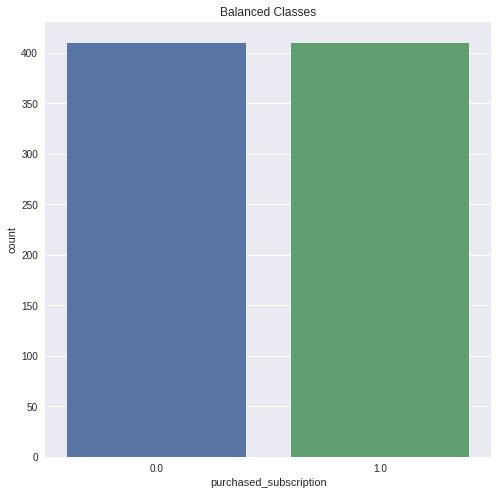

In [ ]:
# Concatenate both dataframes again
balanced_df = pd.concat([class1, class0])

#plot the dataset after the undersampling
plt.figure(figsize=(8, 8))
sns.countplot('purchased_subscription', data=balanced_df)
plt.title('Balanced Classes')
plt.show()


In [ ]:
X = balanced_df.drop('purchased_subscription',axis=1)
y = balanced_df['purchased_subscription']
X

,time_spent_seconds,daily_goal,highest_course_progress,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform,35 - 54,55 - 74,75 or older,Under 18,"$11,000 - $25,000","$151,000 or more","$26,000 - $75,000","$76,000 - $150,000",CO,DE,FR,GB,JP,MX,RU,TW,US,Web browser,iPhone or iPad,I don't use Duolingo,Less than once a month,Monthly,Weekly,Employed part-time,Retired,Unemployed,Yes,Male,Other,Prefer not to say,I'm moderately committed to learning this language.,...,"I want to spend less time on social media,Other (please specify)",I want to spend less time playing games,"I want to spend less time playing games,I want to spend less time watching or reading the news",I want to spend less time watching or reading the news,"I want to spend less time watching or reading the news,Other (please specify)",It's been a lifelong goal to learn this language,"It's been a lifelong goal to learn this language,I want to learn as many languages as I can","It's been a lifelong goal to learn this language,I want to learn as many languages as I can,Language learning is a hobby","It's been a lifelong goal to learn this language,I want to learn as many languages as I can,Language learning is a hobby,Other (please specify)","It's been a lifelong goal to learn this language,Language learning is a hobby","It's been a lifelong goal to learn this language,Other (please specify)",Language learning is a hobby,"Language learning is a hobby,Other (please specify)",Learning this language will be useful in my current job,"Learning this language will be useful in my current job,Learning this language will help me find a job in a different country","Learning this language will be useful in my current job,Learning this language will help me find a job in a different country,Other (please specify)","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country,Other (please specify)","Learning this language will be useful in my current job,Learning this language will help me get a better job in the country where I live,Other (please specify)","Learning this language will be useful in my current job,Other (please specify)",Learning this language will help me find a job in a different country,"Learning this language will help me find a job in a different country,Other (please specify)",Learning this language will help me get a better job in the country where I live,"Learning this language will help me get a better job in the country where I live,Learning this language will help me find a job in a different country",Other (please specify),"Other (please specify),I have an upcoming trip","Other (please specify),Other (please specify)","Other (please specify),Someday I would like to travel to a country that uses this language",Someday I would like to travel to a country that uses this language,"To better understand the ""pop culture"" in this language","To better understand the ""pop culture"" in this language,Other (please specify)","To better understand the ""pop culture"" in this language,To connect with my personal heritage in this culture",To connect with my personal heritage in this culture,"To connect with my personal heritage in this culture,Other (please specify)",Beginner,Intermediate,Not currently a student,Part-time student,True
70,214,50.0,62.0,148.0,20,233.0,227.0,23,1871,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,1,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0
630,263,

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
scaled_features = scaler.transform(X)
df_feat = pd.DataFrame(scaled_features,columns=X.columns)
df_feat.head()
X= df_feat
#y = df.iloc[:, -1]
y


70     1.0
630    1.0
842    1.0
96     1.0
86     1.0
      ... 
497    0.0
462    0.0
849    0.0
454    0.0
742    0.0
Name: purchased_subscription, Length: 820, dtype: float64

In [ ]:
#citation for code
##https://www.dataquest.io/blog/learning-curves-machine-learning/
#https://www.ritchieng.com/machinelearning-learning-curve/

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve 
#from sklearn.learning_curve import learning_curve
import matplotlib.pyplot as plt
from sklearn.metrics import explained_variance_score, make_scorer
#from sklearn.cross_validation import KFold
from sklearn.model_selection import KFold
import numpy as np
plt.style.use('seaborn')

def plot_my_curve(myClf, cv = 5, random_state = 42, myTitle = "DecisionTree"):
    
    train_sizes, train_scores, test_scores = learning_curve(myClf, X_train, y_train, n_jobs=-1, 
                                                            cv=cv, train_sizes=np.linspace(.1, 1.0, 5), 
                                                            verbose=0,scoring='accuracy', random_state= random_state)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(myTitle)
    plt.legend(loc="best")
    plt.xlabel("Training Set Size")
    plt.ylabel("Accuracy Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    #plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-',color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend()
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    #plt.ylim(-.1,1.1)
    plt.ylim(min(test_scores_mean) - 0.1, max(train_scores_mean) + 0.1)
    plt.show()

    
#https://www.dataquest.io/blog/learning-curves-machine-learning/ 
def plot_rmse_curve(myClf, cv = 5, random_state = 42, myTitle="DecisionTree"):
    
    train_sizes, train_scores, validation_scores = learning_curve(myClf, X_train, y_train, n_jobs=-1,
                                                                  random_state= random_state, 
                                                                  cv=cv, scoring = 'neg_mean_squared_error', 
                                                                  train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)
    
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'o-',color="b",label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-',color="g", label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a '+ myTitle + ' model', fontsize = 18, y = 1.03)
    plt.legend()
    #plt.ylim(0,0.5)
    plt.ylim(0,0.5)
    
    
def plot_my_curve_fs(myClf, cv = 5, random_state = 42, myTitle = "DecisionTree"):
    
    train_sizes, train_scores, test_scores = learning_curve(myClf, X_train, y_train, n_jobs=-1, 
                                                            cv=cv, train_sizes=np.linspace(.1, 1.0, 5), 
                                                            verbose=0, random_state= random_state)

    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    
    plt.figure()
    plt.title(myTitle)
    plt.legend(loc="best")
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    plt.gca().invert_yaxis()
    
    # box-like grid
    #plt.grid()
    
    # plot the std deviation as a transparent range at each training set size
    plt.fill_between(train_sizes, train_scores_mean - train_scores_std, train_scores_mean + train_scores_std, alpha=0.1, color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std, test_scores_mean + test_scores_std, alpha=0.1, color="g")
    
    # plot the average training and test score lines at each training set size
    plt.plot(train_sizes, train_scores_mean, 'o-',color="b", label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g", label="Cross-validation score")
    plt.legend()
    
    # sizes the window for readability and displays the plot
    # shows error from 0 to 1.1
    plt.ylim(-.1,1.1)
    #plt.ylim(min(test_scores_mean) - 0.1, max(train_scores_mean) + 0.1)
    plt.show()
    
    
#https://www.dataquest.io/blog/learning-curves-machine-learning/ 
def plot_rmse_curve_fs(myClf, cv = 5, random_state = 42, myTitle="DecisionTree"):
    
    train_sizes, train_scores, validation_scores = learning_curve(myClf, X_train, y_train, n_jobs=-1,
                                                                  random_state= random_state, 
                                                                  cv=cv, scoring = 'neg_mean_squared_error', 
                                                                  train_sizes=np.linspace(.1, 1.0, 5), verbose=0)
    print('Training scores:\n\n', train_scores)
    print('\n', '-' * 70) # separator to make the output easy to read
    print('\nValidation scores:\n\n', validation_scores)
    
    train_scores_mean = -train_scores.mean(axis = 1)
    validation_scores_mean = -validation_scores.mean(axis = 1)
    print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
    print('\n', '-' * 20) # separator
    print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))
    
    
    plt.style.use('seaborn')
    plt.plot(train_sizes, train_scores_mean,'o-',color="b",label = 'Training error')
    plt.plot(train_sizes, validation_scores_mean, 'o-',color="g", label = 'Validation error')
    plt.ylabel('MSE', fontsize = 14)
    plt.xlabel('Training set size', fontsize = 14)
    plt.title('Learning curves for a '+ myTitle + ' model', fontsize = 18, y = 1.03)
    plt.legend()
    plt.ylim(0,0.5)
    #plt.ylim()

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    test_size=0.25,random_state=42)

In [ ]:
###Decision tress

reg_dtree = DecisionTreeClassifier(random_state=42)
eta = time.time()
reg_dt = reg_dtree.fit(X_train, y_train)
reg_dtree_time = time.time() - eta
print("reg_dtree_time == ", reg_dtree_time)
predictions = reg_dtree.predict(X_test)
from sklearn.metrics import classification_report,confusion_matrix
print(classification_report(y_test,predictions))
print(confusion_matrix(y_test,predictions))
from sklearn import metrics 
print("Accuracy:",metrics.accuracy_score(y_test, predictions))
print("Accuracy f1 Score:",metrics.f1_score(y_test, predictions, average='weighted'))

reg_dtree_time ==  0.016476869583129883
              precision    recall  f1-score   support

         0.0       0.70      0.65      0.67        99
         1.0       0.69      0.75      0.72       106

    accuracy                           0.70       205
   macro avg       0.70      0.70      0.70       205
weighted avg       0.70      0.70      0.70       205

[[64 35]
 [27 79]]
Accuracy: 0.697560975609756
Accuracy f1 Score: 0.6966927296067219


No handles with labels found to put in legend.


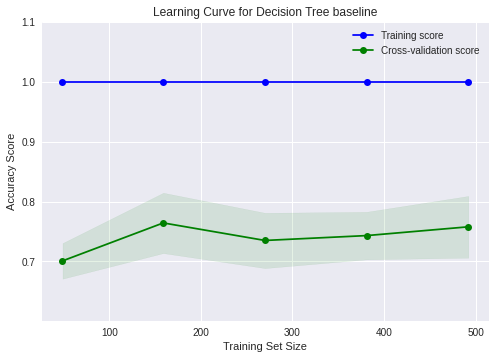

Training scores:

 [[-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]
 [-0. -0. -0. -0. -0.]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.32520325 -0.29268293 -0.26829268 -0.26829268 -0.34146341]
 [-0.29268293 -0.2195122  -0.21138211 -0.16260163 -0.29268293]
 [-0.34146341 -0.25203252 -0.24390244 -0.20325203 -0.28455285]
 [-0.24390244 -0.28455285 -0.30081301 -0.18699187 -0.26829268]
 [-0.29268293 -0.2601626  -0.20325203 -0.16260163 -0.29268293]]
Mean training scores

 49    -0.0
159   -0.0
270   -0.0
381   -0.0
492   -0.0
dtype: float64

 --------------------

Mean validation scores

 49     0.299187
159    0.235772
270    0.265041
381    0.256911
492    0.242276
dtype: float64


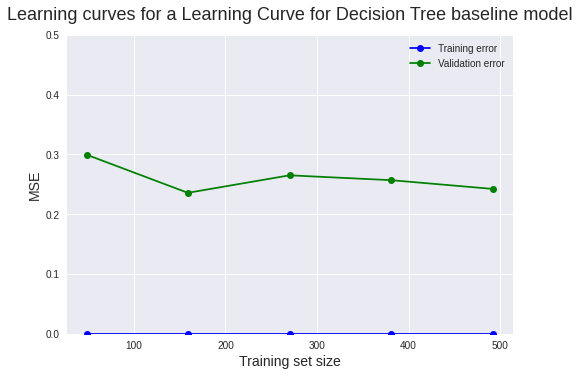

In [ ]:
plot_my_curve(reg_dtree, myTitle="Learning Curve for Decision Tree baseline")
plot_rmse_curve(reg_dtree, myTitle="Learning Curve for Decision Tree baseline")

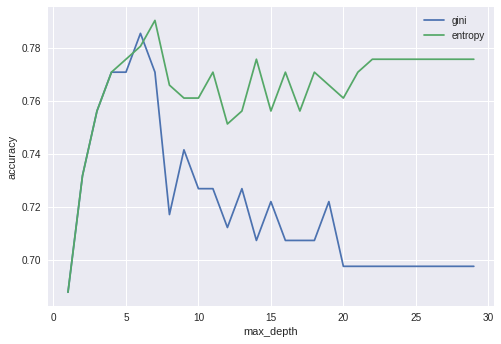

In [ ]:
#citation : https://laptrinhx.com/decision-trees-parametric-optimization-1233579950/
max_depth = []
acc_gini = []
acc_entropy = []
for i in range(1,30):
    dtree = DecisionTreeClassifier(criterion='gini', max_depth=i, random_state=42)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_gini.append(metrics.accuracy_score(y_test, pred))
    ####
    dtree = DecisionTreeClassifier(criterion='entropy', max_depth=i, random_state=42)
    dtree.fit(X_train, y_train)
    pred = dtree.predict(X_test)
    acc_entropy.append(metrics.accuracy_score(y_test, pred))
    ####
    max_depth.append(i)
d = pd.DataFrame({'acc_gini':pd.Series(acc_gini), 
 'acc_entropy':pd.Series(acc_entropy),
 'max_depth':pd.Series(max_depth)})
# visualizing changes in parameters
plt.plot('max_depth','acc_gini', data=d, label='gini')
plt.plot('max_depth','acc_entropy', data=d, label='entropy')
plt.xlabel('max_depth')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
dtree_entropy = DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=42)
dtree_entropy.fit(X_train, y_train)
pred_entropy = dtree_entropy.predict(X_test)
print(accuracy_score(y_test, pred_entropy))
print(metrics.f1_score(y_test, pred_entropy, average='weighted'))

0.7902439024390244
0.7889337142020068


In [ ]:
dtree_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=42)
dtree_gini.fit(X_train, y_train)
pred_gini = dtree_gini.predict(X_test)
print(accuracy_score(y_test, pred))
print(metrics.f1_score(y_test, pred_gini, average='weighted'))

0.775609756097561
0.7674628788187933


In [ ]:
from sklearn import metrics
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, pred_entropy))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, pred_entropy))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, pred_entropy)))
pred = pred_entropy
from sklearn import metrics 
print(confusion_matrix(y_test,pred))
print("Accuracy:",metrics.accuracy_score(y_test, pred))
print("Accuracy F1" , metrics.f1_score(y_test, pred, average='weighted'))

Mean Absolute Error: 0.2097560975609756
Mean Squared Error: 0.2097560975609756
Root Mean Squared Error: 0.45799137280190727
[[71 28]
 [15 91]]
Accuracy: 0.7902439024390244
Accuracy F1 0.7889337142020068


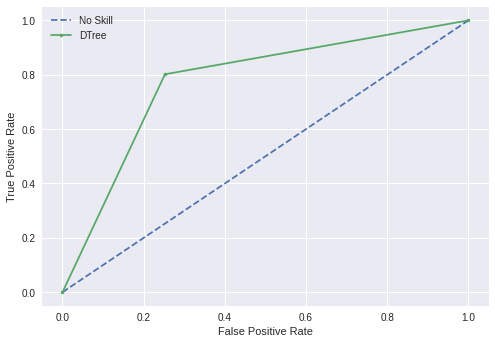

No Skill: ROC AUC=0.500
Logistic: ROC AUC=0.775


In [ ]:
# roc curve and auc
#citation : https://machinelearningmastery.com/roc-curves-and-precision-recall-curves-for-classification-in-python/
from sklearn.datasets import make_classification
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from matplotlib import pyplot

ns_probs = [0 for _ in range(len(y_test))]

lr_probs = dtree.predict_proba(X_test)
lr_probs = lr_probs[:, 1]
lr_auc = roc_auc_score(y_test, lr_probs)
ns_auc = roc_auc_score(y_test, ns_probs)

lr_fpr, lr_tpr, _ = roc_curve(y_test, lr_probs, pos_label=1)
ns_fpr, ns_tpr, _ = roc_curve(y_test, ns_probs, pos_label=0)


pyplot.plot(ns_fpr, ns_tpr, linestyle='--', label='No Skill')
pyplot.plot(lr_fpr, lr_tpr, marker='.', label='DTree')
# axis labels
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
# show the legend
pyplot.legend()
# show the plot
pyplot.show()

print('No Skill: ROC AUC=%.3f' % (ns_auc))
print('Logistic: ROC AUC=%.3f' % (lr_auc))

No handles with labels found to put in legend.


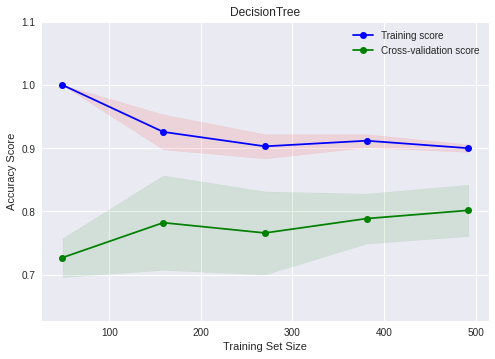

In [ ]:
plot_my_curve(dtree_entropy, cv=5)

Training scores:

 [[-0.         -0.         -0.         -0.         -0.        ]
 [-0.01886792 -0.08805031 -0.08805031 -0.08805031 -0.08805031]
 [-0.07777778 -0.07407407 -0.0962963  -0.11851852 -0.11851852]
 [-0.1023622  -0.07349081 -0.0839895  -0.09711286 -0.0839895 ]
 [-0.09756098 -0.09349593 -0.09552846 -0.1097561  -0.10365854]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.26829268 -0.28455285 -0.23577236 -0.25203252 -0.32520325]
 [-0.32520325 -0.2601626  -0.12195122 -0.14634146 -0.23577236]
 [-0.35772358 -0.20325203 -0.18699187 -0.17886179 -0.24390244]
 [-0.23577236 -0.19512195 -0.17886179 -0.17073171 -0.27642276]
 [-0.21138211 -0.22764228 -0.19512195 -0.12195122 -0.23577236]]
Mean training scores

 49    -0.000000
159    0.074214
270    0.097037
381    0.088189
492    0.100000
dtype: float64

 --------------------

Mean validation scores

 49     0.273171
159    0.217886
270    0.234146
381    0.211382
492    0.198374
dtype: 

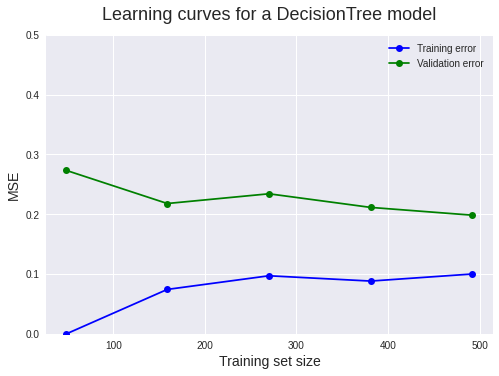

In [ ]:
plot_rmse_curve(dtree_entropy, cv =5)

In [ ]:
# KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
reg_knn = KNeighborsClassifier()
eta = time.time()
reg_knn.fit(X_train, y_train)
reg_knn_time = time.time() - eta
print("reg_knn_time == ", reg_knn_time)

reg_knn_time ==  0.021793365478515625


0.5902439024390244
[[54 45]
 [39 67]]
              precision    recall  f1-score   support

         0.0       0.58      0.55      0.56        99
         1.0       0.60      0.63      0.61       106

    accuracy                           0.59       205
   macro avg       0.59      0.59      0.59       205
weighted avg       0.59      0.59      0.59       205

ROC CURVE SCORE ==  0.5887650085763292


No handles with labels found to put in legend.


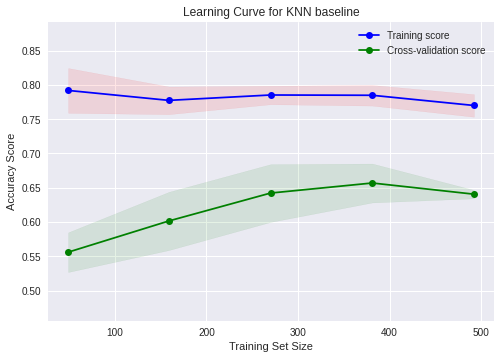

Training scores:

 [[-0.14285714 -0.2244898  -0.2244898  -0.2244898  -0.2244898 ]
 [-0.19496855 -0.20125786 -0.23899371 -0.23899371 -0.23899371]
 [-0.24074074 -0.2037037  -0.21481481 -0.20740741 -0.20740741]
 [-0.19422572 -0.20209974 -0.21784777 -0.22834646 -0.2335958 ]
 [-0.21341463 -0.21138211 -0.25       -0.24796748 -0.22764228]]

 ----------------------------------------------------------------------

Validation scores:

 [[-0.40650407 -0.43902439 -0.42276423 -0.46341463 -0.48780488]
 [-0.38211382 -0.3495935  -0.43089431 -0.36585366 -0.46341463]
 [-0.34146341 -0.29268293 -0.3902439  -0.3495935  -0.41463415]
 [-0.33333333 -0.31707317 -0.33333333 -0.33333333 -0.39837398]
 [-0.36585366 -0.3495935  -0.35772358 -0.35772358 -0.36585366]]
Mean training scores

 49     0.208163
159    0.222642
270    0.214815
381    0.215223
492    0.230081
dtype: float64

 --------------------

Mean validation scores

 49     0.443902
159    0.398374
270    0.357724
381    0.343089
492    0.359350
dtype: 

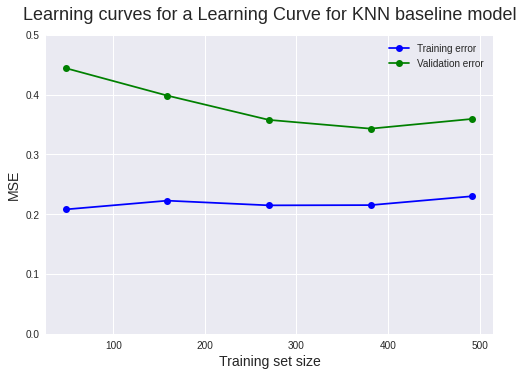

In [ ]:
pred = reg_knn.predict(X_test)
print(accuracy_score(y_test, pred))
print(confusion_matrix(y_test,pred))
print(classification_report(y_test,pred))
print("ROC CURVE SCORE == ", roc_auc_score(y_test, pred))

plot_my_curve(reg_knn, myTitle="Learning Curve for KNN baseline")
plot_rmse_curve(reg_knn, myTitle="Learning Curve for KNN baseline")

Text(0.5, 0, 'Hyper parameter metric ')

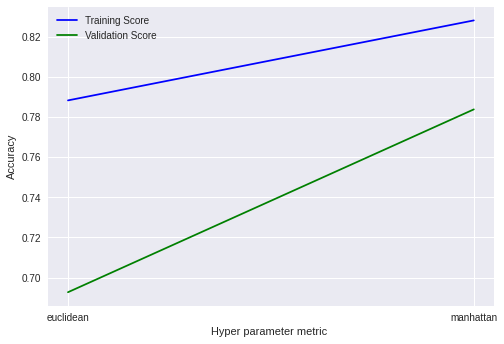

In [ ]:
metric =  ['euclidean','manhattan']
model = KNeighborsClassifier(n_neighbors=9)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='metric', param_range=metric,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(metric, train_scores_mean,color="b",label = 'Training Score')
plt.plot(metric, val_scores_mean,color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter metric ")

Text(0.5, 1.0, "Validation Curve Accuracy Vs Hyper parameter 'nearest neighbor'")

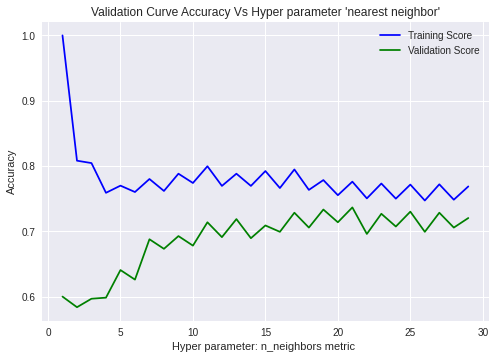

In [ ]:
n_neighbors = list(range(1,30))
# metric =  ['euclidean','manhattan']
model = KNeighborsClassifier(metric='euclidean')
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='n_neighbors', param_range=n_neighbors,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(n_neighbors, train_scores_mean,color="b",label = 'Training Score')
plt.plot(n_neighbors, val_scores_mean,color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter: n_neighbors metric ")
plt.title("Validation Curve Accuracy Vs Hyper parameter 'nearest neighbor'")

hyp_knn_time ==  0.017868518829345703
0.6536585365853659


No handles with labels found to put in legend.


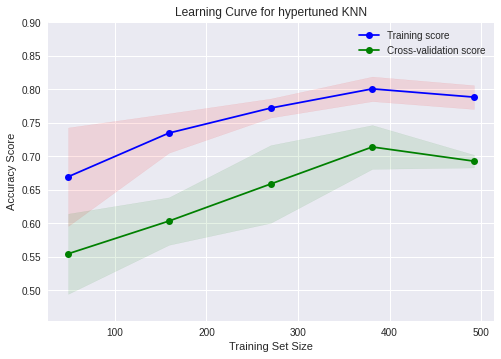

In [ ]:
#hypertuned_model = KNeighborsClassifier(n_neighbors=19, metric='euclidean')
hypertuned_knn = KNeighborsClassifier(n_neighbors=9, leaf_size=8,  metric='euclidean', p=2)
eta = time.time()
hype_knn= hypertuned_knn.fit(X_train, y_train)
hyp_knn_time = time.time() - eta
print("hyp_knn_time == ", hyp_knn_time)
pred = hypertuned_knn.predict(X_test)
print(accuracy_score(y_test, pred))
hype_knn.get_params
plot_my_curve(hypertuned_knn, myTitle="Learning Curve for hypertuned KNN")
#plot_my_curve_fs(hypertuned_knn, myTitle="Learning Curve for hypertuned KNN")

ADA BOOST

In [ ]:
from sklearn.ensemble import GradientBoostingClassifier
reg_gbC = GradientBoostingClassifier(random_state=42)
eta = time.time()
reg_gbC.fit(X_train, y_train)
reg_gbc_time = time.time() - eta
print("reg_gbc_time == ", reg_gbc_time)

reg_gbc_time ==  0.3799872398376465


In [ ]:
y_pred = reg_gbC.predict(X_test)
accuracy_score(y_test, y_pred)

0.8146341463414634

No handles with labels found to put in legend.


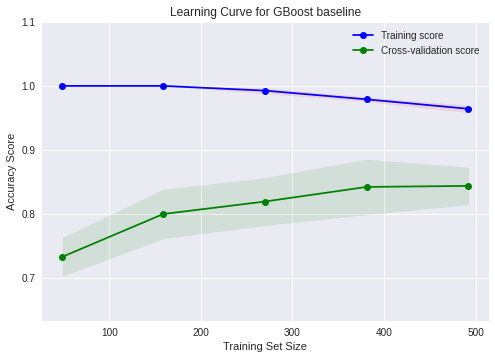

In [ ]:
plot_my_curve(reg_gbC, myTitle="Learning Curve for GBoost baseline")

[0.85365854 0.9203252  0.96422764 0.98699187 0.99552846 0.9995935
 1.         1.        ]
VLA
[0.80813008 0.84552846 0.84390244 0.84065041 0.83252033 0.83089431
 0.81626016 0.80487805]


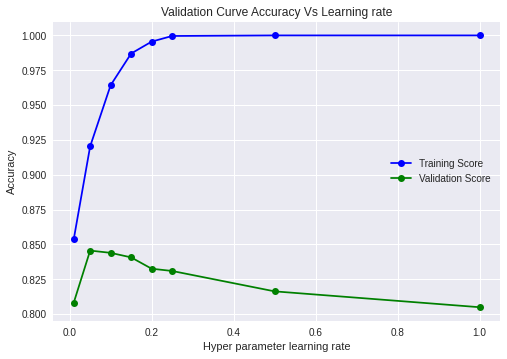

In [ ]:
#learning_rates = [1, 0.5, 0.25, 0.1, 0.05, 0.01]
learning_rates = [0.01, 0.05, 0.1, 0.15, 0.2, 0.25, 0.5, 1]


model =  GradientBoostingClassifier(random_state=42)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='learning_rate', param_range=learning_rates,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(learning_rates, train_scores_mean,'o-',color="b",label = 'Training Score')
plt.plot(learning_rates, val_scores_mean, 'o-',color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter learning rate")
plt.title("Validation Curve Accuracy Vs Learning rate")

print(train_scores_mean)
print("VLA")
print(val_scores_mean)

In [ ]:
model_test =  GradientBoostingClassifier(learning_rate=0.15,random_state=42)
model_test.fit(X_train, y_train)
pred = model_test.predict(X_test)
print(accuracy_score(y_test, pred))

0.8439024390243902


In [ ]:
hypertuned_model_gboost =  GradientBoostingClassifier(learning_rate=0.15,random_state=42)
eta = time.time()
hypertuned_model_gboost.fit(X_train, y_train)
hyp_gbc_time = time.time() - eta
print("hyp_gbc_time == ", hyp_gbc_time)
pred = hypertuned_model_gboost.predict(X_test)
print(accuracy_score(y_test, pred))

hyp_gbc_time ==  0.3916504383087158
0.8439024390243902


No handles with labels found to put in legend.


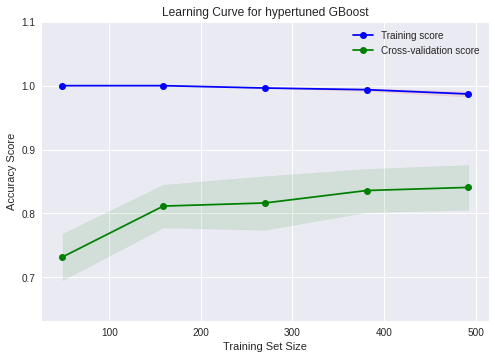

In [ ]:
plot_my_curve(hypertuned_model_gboost, myTitle="Learning Curve for hypertuned GBoost")

NEURAL NET

In [ ]:
from sklearn.neural_network import MLPClassifier
reg_mlp = MLPClassifier(random_state=42)
eta = time.time()
reg_mlp.fit(X_train, y_train.values.ravel())
reg_mlp_time = time.time() - eta
print("reg_mlp_time == ", reg_mlp_time)

reg_mlp_time ==  1.9006948471069336


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


In [ ]:
predictions = reg_mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
accuracy_score(y_test,predictions)

[[71 28]
 [21 85]]
              precision    recall  f1-score   support

         0.0       0.77      0.72      0.74        99
         1.0       0.75      0.80      0.78       106

    accuracy                           0.76       205
   macro avg       0.76      0.76      0.76       205
weighted avg       0.76      0.76      0.76       205



0.7609756097560976

No handles with labels found to put in legend.


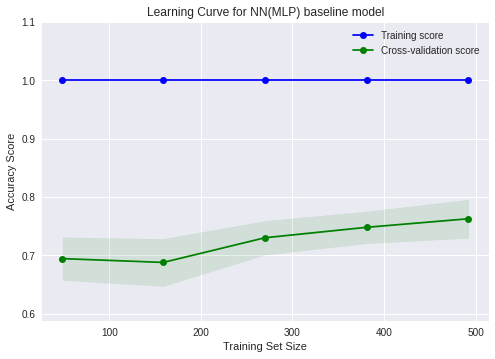

In [ ]:
plot_my_curve(reg_mlp, myTitle="Learning Curve for NN(MLP) baseline model")

No handles with labels found to put in legend.


Text(0.5, 1.0, 'Loss curve for NN(MLP) baseline model')

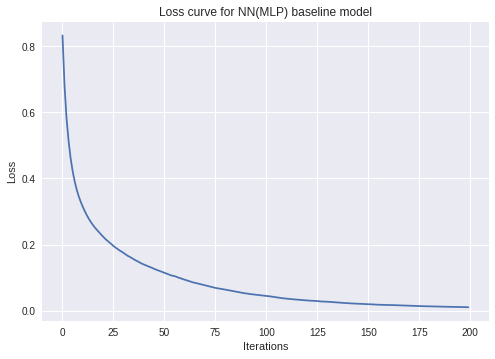

In [ ]:
plt.plot(reg_mlp.loss_curve_)
plt.legend()
plt.ylabel("Loss")
plt.xlabel("Iterations")
plt.title("Loss curve for NN(MLP) baseline model")

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[0.9898374  0.98577236 0.98170732 0.97154472 0.97560976]
 [0.98373984 0.97764228 0.97764228 0.98170732 0.98780488]
 [0.99796748 0.99593496 0.99796748 0.99390244 0.99593496]
 [0.99796748 0.99796748 0.9898374  0.99796748 0.99390244]
 [1.         0.99593496 0.99593496 0.99390244 0.99186992]
 [0.99593496 1.         0.99796748 0.99796748 0.99796748]]
VLA
[[0.65853659 0.76422764 0.76422764 0.82113821 0.79674797]
 [0.66666667 0.74796748 0.72357724 0.78861789 0.71544715]
 [0.69105691 0.76422764 0.69105691 0.7804878  0.75609756]
 [0.68292683 0.73170732 0.78861789 0.77235772 0.69105691]
 [0.7398374  0.80487805 0.72357724 0.82926829 0.7398374 ]
 [0.72357724 0.77235772 0.7398374  0.76422764 0.74796748]]
RESULTSS


/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


0.7365853658536585


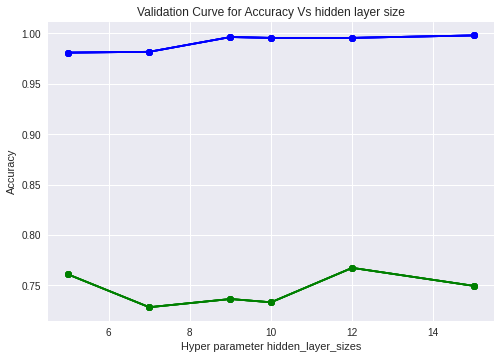

In [ ]:
# hidden_layer_sizes = [(5,10), (20, 30), (10,100)]
hidden_layer_sizes = [(5,5), (7, 7), (9,9), (10,10), (12,12) ,(15,15)]
#model = MLPClassifier(random_state=42)
model = MLPClassifier(random_state=42)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='hidden_layer_sizes', param_range=hidden_layer_sizes,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(hidden_layer_sizes, train_scores_mean,'o-',color="b",label = 'Training Score')
plt.plot(hidden_layer_sizes, val_scores_mean, 'o-',color="g", label = 'Validation Score')
plt.plot(hidden_layer_sizes, train_scores_mean,'o-',color="b")
plt.plot(hidden_layer_sizes, val_scores_mean, 'o-',color="g")
#plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter hidden_layer_sizes")
print(train_scores)
print("VLA")
print(val_scores)
plt.title("Validation Curve for Accuracy Vs hidden layer size")



print("RESULTSS")
model_test =  MLPClassifier(random_state=42, hidden_layer_sizes=(7,7))
model_test.fit(X_train, y_train)
pred = model_test.predict(X_test)
print(accuracy_score(y_test, pred))

[[1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [0.98780488 0.99796748 0.99593496 0.99796748 0.99796748]]
VLA
[[0.73170732 0.79674797 0.7804878  0.78861789 0.71544715]
 [0.73170732 0.78861789 0.74796748 0.77235772 0.73170732]
 [0.74796748 0.75609756 0.77235772 0.83739837 0.7398374 ]
 [0.71544715 0.78861789 0.70731707 0.74796748 0.77235772]]


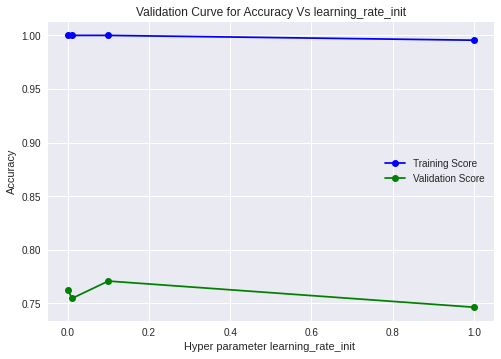

In [ ]:
learning_rate_init = [0.001, 0.01, 0.1, 1]

model = MLPClassifier(random_state=42)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='learning_rate_init', param_range=learning_rate_init,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(learning_rate_init, train_scores_mean,'o-',color="b",label = 'Training Score')
plt.plot(learning_rate_init, val_scores_mean, 'o-',color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter learning_rate_init ")
plt.title("Validation Curve for Accuracy Vs learning_rate_init")

print(train_scores)
print("VLA")
print(val_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


[[1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]
 [1. 1. 1. 1. 1.]]
VLA
[[0.7398374  0.79674797 0.78861789 0.78861789 0.71544715]
 [0.73170732 0.79674797 0.79674797 0.79674797 0.73170732]
 [0.76422764 0.80487805 0.79674797 0.82113821 0.7398374 ]
 [0.77235772 0.82113821 0.82113821 0.82113821 0.77235772]
 [0.77235772 0.82113821 0.82113821 0.82113821 0.77235772]
 [0.77235772 0.82113821 0.81300813 0.82926829 0.77235772]]


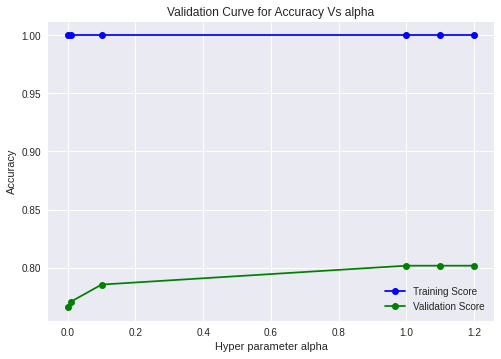

In [ ]:
alpha = [0.001, 0.01, 0.1, 1, 1.1, 1.2]
model = MLPClassifier(random_state=42)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='alpha', param_range=alpha,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(alpha, train_scores_mean,'o-',color="b",label = 'Training Score')
plt.plot(alpha, val_scores_mean, 'o-',color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter alpha")
plt.title("Validation Curve for Accuracy Vs alpha")

print(train_scores)
print("VLA")
print(val_scores)

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (10) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (20) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/us

[[0.8902439  0.90447154 0.88617886 0.89227642 0.89837398]
 [0.94105691 0.94308943 0.94308943 0.94105691 0.95325203]
 [0.99186992 0.99593496 0.98780488 0.98577236 0.99390244]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]
 [1.         1.         1.         1.         1.        ]]
VLA
[[0.69105691 0.74796748 0.69918699 0.80487805 0.70731707]
 [0.7398374  0.77235772 0.75609756 0.81300813 0.70731707]
 [0.7398374  0.78861789 0.74796748 0.82113821 0.69105691]
 [0.73170732 0.79674797 0.76422764 0.77235772 0.70731707]
 [0.73170732 0.79674797 0.7804878  0.78861789 0.71544715]
 [0.73170732 0.79674797 0.7804878  0.78861789 0.71544715]
 [0.73170732 0.79674797 0.7804878  0.78861789 0.71544715]]


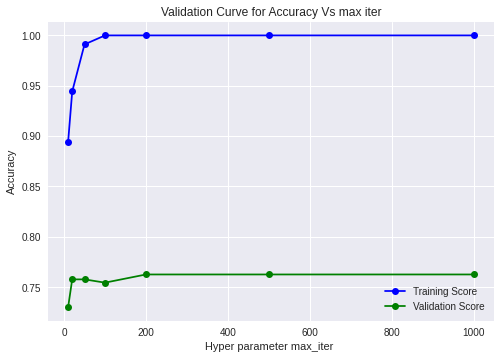

In [ ]:
max_iter = [10, 20, 50, 100, 200, 500, 1000]
model = MLPClassifier(random_state=42)
train_scores, val_scores = validation_curve(model, X_train, y_train, param_name='max_iter', param_range=max_iter,
                                          cv=5)

train_scores_mean = np.mean(train_scores, axis=1)
val_scores_mean = np.mean(val_scores, axis=1)
plt.plot(max_iter, train_scores_mean,'o-',color="b",label = 'Training Score')
plt.plot(max_iter, val_scores_mean, 'o-',color="g", label = 'Validation Score')
plt.legend()
plt.ylabel("Accuracy")
plt.xlabel("Hyper parameter max_iter ")
plt.title("Validation Curve for Accuracy Vs max iter")

print(train_scores)
print("VLA")
print(val_scores)

In [ ]:

hypertuned_mlp = MLPClassifier(hidden_layer_sizes=(12,12), solver='sgd', max_iter=200, 
                             random_state=42, alpha=1.0,learning_rate_init=.15)
eta = time.time()
hypertuned_mlp.fit(X_train, y_train)
hyp_mlp_time = time.time() - eta
print("hyp_mlp_time == ", hyp_mlp_time)

hyp_mlp_time ==  0.13694334030151367


In [ ]:
predictions = hypertuned_mlp.predict(X_test)
from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(y_test,predictions))
print(classification_report(y_test,predictions))
accuracy_score(y_test,predictions)

[[81 18]
 [20 86]]
              precision    recall  f1-score   support

         0.0       0.80      0.82      0.81        99
         1.0       0.83      0.81      0.82       106

    accuracy                           0.81       205
   macro avg       0.81      0.81      0.81       205
weighted avg       0.81      0.81      0.81       205



0.8146341463414634

No handles with labels found to put in legend.


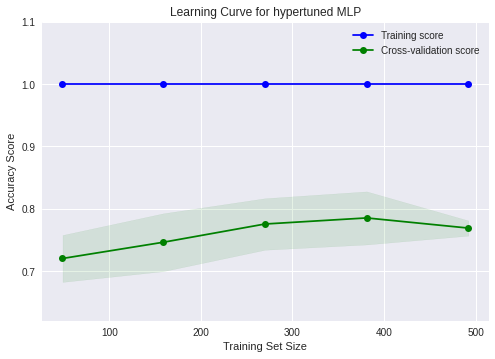

In [ ]:
plot_my_curve(hypertuned_mlp, myTitle="Learning Curve for hypertuned MLP")

Optimal number of features: 20
198
100


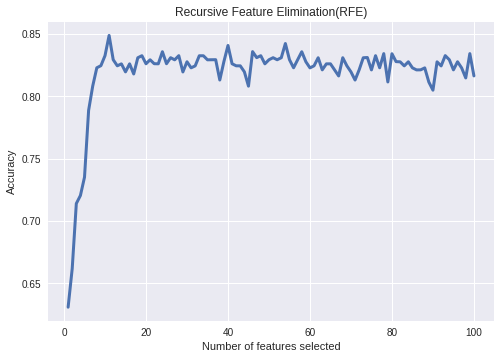

In [ ]:
np.random.seed(42)
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import RFECV
rfc = RandomForestClassifier(random_state=101)
rfecv = RFECV(estimator=rfc, step=2, cv=10, scoring='accuracy')
#dropping unkonwns columns
Xt= X_train.copy()


rfecv_fit = rfecv.fit(Xt, y_train)
print('Optimal number of features: {}'.format(rfecv.n_features_))
print(len(Xt.columns))
print(len(rfecv.grid_scores_))
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_, linewidth=3)
plt.title('Recursive Feature Elimination(RFE)')
plt.xlabel('Number of features selected')
plt.ylabel('Accuracy')

plt.show()

In [ ]:
Xnew = Xt.copy()
Xnew.drop(Xnew.columns[np.where(rfecv.support_ == False)[0]], axis=1, inplace=True)
rfecv.estimator_.feature_importances_

array([0.06033947, 0.02183103, 0.06111191, 0.08013492, 0.0721624 ,
       0.1370336 , 0.1524039 , 0.09432193, 0.05398996, 0.02162978,
       0.00993783, 0.02041056, 0.01503353, 0.06283073, 0.01999573,
       0.01512481, 0.0160566 , 0.04575145, 0.01246681, 0.02743307])

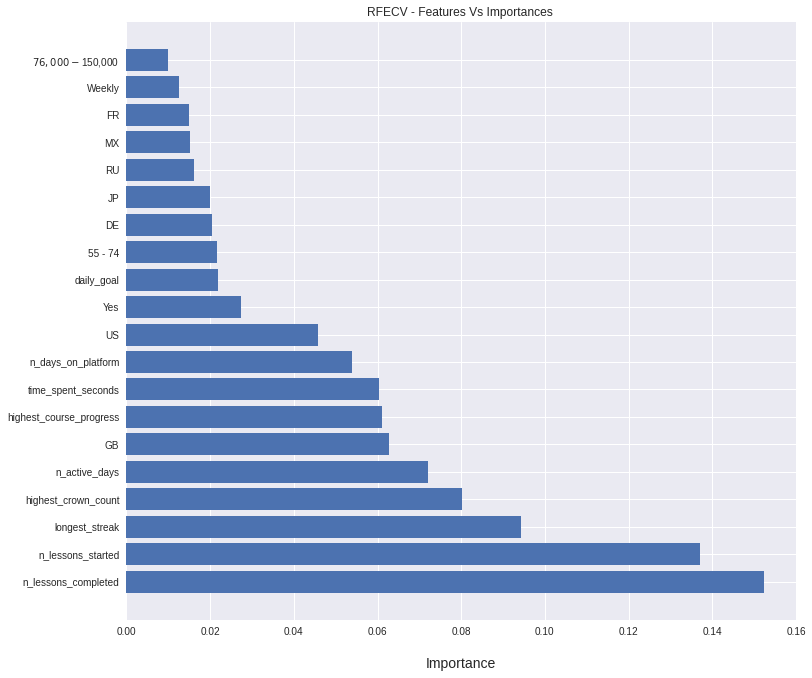

In [ ]:
dset = pd.DataFrame()
dset['attr'] = Xnew.columns
dset['importance'] = rfecv.estimator_.feature_importances_[:]
dset = dset.sort_values(by='importance', ascending=False)

plt.figure(figsize=(12, 11))
plt.barh(y=dset['attr'], width=dset['importance'])
plt.title('RFECV - Features Vs Importances ')
plt.xlabel('Importance', fontsize=14, labelpad=20)
plt.show()

In [ ]:
Xnew.columns

Index(['time_spent_seconds', 'daily_goal', 'highest_course_progress',
       'highest_crown_count', 'n_active_days', 'n_lessons_started',
       'n_lessons_completed', 'longest_streak', 'n_days_on_platform',
       '55 - 74', '$76,000 - $150,000', 'DE', 'FR', 'GB', 'JP', 'MX', 'RU',
       'US', 'Weekly', 'Yes'],
      dtype='object')

In [ ]:
len(Xnew.columns)

20

In [ ]:
merged_df

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,7/10/18 23:19,20.0,11.0,False,True,55.0,93,1161.0,1028.0,40,117
1,35ca00d772c911e992e8dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Weekly,Employed part-time,Yes,Male,Other apps,I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I want to use my time more productively,I want to spend less time playing games,Intermediate,Part-time student,1,234,11/13/17 17:43,20.0,10.0,False,False,19.0,9,20.0,8.0,2,356
2,35ca043572c911e9bd63dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,265,8/6/13 21:15,20.0,58.0,True,True,263.0,76,228.0,222.0,611,1916
3,35ca083a72c911e985d1dca9049399ef,35 - 54,"$151,000 or more",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed part-time,Yes,Male,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,401,4/14/18 20:42,50.0,51.0,False,True,482.0,95,1094.0,628.0,205,204
4,35ca0a6b72c911e9bf3edca9049399ef,55 - 74,"$26,000 - $75,000",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to advance professionally or economically,Learning this language will be useful in my cu...,Intermediate,Not currently a student,1,425,1/6/18 1:30,30.0,47.0,True,True,387.0,95,1189.0,1072.0,137,302
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
926,35d3fbf572c911e99f33dca9049399ef,35 - 54,"$11,000 - $25,000",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,No,Female,"Other apps,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am an expat,I am studying ...",Beginner,Not currently a student,1,-215,10/31/18 14:46,20.0,13.0,False,False,18.0,5,74.0,69.0,5,4
927,35d19eb072c911e99da9dca9049399ef,35 - 54,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,Other apps,I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,-277,7/31/14 14:07,20.0,38.0,False,True,180.0,94,234.0,233.0,291,1

In [ ]:
merged_df[(merged_df.purchased_subscription == True) & (merged_df.n_lessons_completed >= 20)]

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,7/10/18 23:19,20.0,11.0,False,True,55.0,93,1161.0,1028.0,40,117
2,35ca043572c911e9bd63dca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to use my time more productively,"I want to spend less time on social media,I wa...",Intermediate,Not currently a student,1,265,8/6/13 21:15,20.0,58.0,True,True,263.0,76,228.0,222.0,611,1916
3,35ca083a72c911e985d1dca9049399ef,35 - 54,"$151,000 or more",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed part-time,Yes,Male,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,401,4/14/18 20:42,50.0,51.0,False,True,482.0,95,1094.0,628.0,205,204
4,35ca0a6b72c911e9bf3edca9049399ef,55 - 74,"$26,000 - $75,000",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to advance professionally or economically,Learning this language will be useful in my cu...,Intermediate,Not currently a student,1,425,1/6/18 1:30,30.0,47.0,True,True,387.0,95,1189.0,1072.0,137,302
5,35ca147d72c911e9a577dca9049399ef,35 - 54,"$151,000 or more",JP,Web browser,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Other apps,Stories/novels/children's books,Mov...",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,1051,4/1/18 20:58,10.0,57.0,False,True,407.0,90,574.0,514.0,216,217
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
918,35d2929772c911e9abfbdca9049399ef,55 - 74,"$76,000 - $150,000",MX,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,In-person language class,I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to communicate with locals in a meaning...,Beginner,Not currently a student,1,-229,10/5/17 18:42,10.0,43.0,False,True,87.0,95,237.0,207.0,305,395
919,35ce08c272c911e99638dca9049399ef,35 - 54,"$76,000 - $150,000",MX,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Movies/TV Shows,In-person language class",I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I want to improve relationships with some of t...,I want to better communicate with my grandpare...,Beginner,Not currently a student,1,-151,9/2

In [ ]:
merged_df[(merged_df.purchased_subscription == False) & (merged_df.n_lessons_completed >= 20)]

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
6,35ca15dc72c911e9ac5fdca9049399ef,18-34,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed part-time,Yes,Male,"Stories/novels/children's books,Movies/TV Show...",I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to communicate with locals in a meaning...,Beginner,Not currently a student,1,173,2/8/16 18:53,30.0,27.0,False,False,74.0,71,226.0,205.0,18,1000
7,35ca168572c911e9ba92dca9049399ef,35 - 54,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,Online language class,I'm extremely committed to learning this langu...,I am using Duolingo to learn this language for...,I am preparing for a trip,I have an upcoming trip,Beginner,Not currently a student,1,219,8/20/18 18:33,20.0,13.0,False,False,47.0,76,371.0,296.0,62,76
11,35ca200c72c911e9b582dca9049399ef,55 - 74,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Stories/novels/children's books,Movies/TV Show...",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I am preparing for a trip,I want to show respect by speaking the local l...,Advanced,Not currently a student,1,277,10/2/14 19:33,10.0,41.0,False,False,143.0,90,393.0,385.0,260,1494
40,35ca76a872c911e9b31edca9049399ef,18-34,"$11,000 - $25,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Prefer not to say,"Other apps,Stories/novels/children's books,Mov...",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I am preparing for a trip,I want to communicate with locals in a meaning...,Intermediate,Not currently a student,1,257,4/4/14 7:29,10.0,57.0,False,False,147.0,86,118.0,87.0,604,1675
44,35ca7d7372c911e9a33edca9049399ef,35 - 54,"$26,000 - $75,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed part-time,Yes,Female,"Textbooks,Speak with others (language events, ...",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I want to improve relationships with some of t...,I want to better communicate with people in my...,Advanced,Not currently a student,1,515,11/10/17 3:09,50.0,70.0,True,False,199.0,88,1052.0,841.0,307,359
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
924,35cc85ba72c911e99217dca9049399ef,18-34,"$26,000 - $75,000",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Male,"Movies/TV Shows,Speak with others (language ev...",I'm moderately committed to learning this lang...,I am using Duolingo to review a language I've ...,I am preparing for a trip,I want to learn some basics in the local langu...,Beginner,Not currently a student,1,-116,1/10/18 14:05,20.0,32.0,False,False,93.0,71,138.0,135.0,21,298
926,35d3fbf572c911e99f33dca9049399ef,35 - 54,"$11,000 - $25,000",GB,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,No,Female,"Other apps,Movies/TV Shows",I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an immigrant,I am an expat,I am studying ...",Beginner,Not currently a student,1,-215,10/31

In [ ]:
merged_df[(merged_df.purchased_subscription == True) & (merged_df.annual_income == "$76,000 - $150,000")]

,user_id,age,annual_income,country,duolingo_platform,duolingo_subscriber,duolingo_usage,employment_status,future_contact,gender,other_resources,primary_language_commitment,primary_language_review,primary_language_motivation,primary_language_motivation_followup,primary_language_proficiency,student,survey_complete,time_spent_seconds,duolingo_start_date,daily_goal,highest_course_progress,took_placement_test,purchased_subscription,highest_crown_count,n_active_days,n_lessons_started,n_lessons_completed,longest_streak,n_days_on_platform
0,35c9ff7072c911e9900ddca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, but I have previously paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other apps,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I am preparing for a trip,I want to learn some basics in the local langu...,Intermediate,Not currently a student,1,229,7/10/18 23:19,20.0,11.0,False,True,55.0,93,1161.0,1028.0,40,117
12,35ca237372c911e9bde7dca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,Other (please specify),I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I need to learn this language for school,"Duolingo is an optional supplement to a class,...",Beginner,Not currently a student,1,196,8/6/18 19:30,50.0,8.0,True,True,39.0,59,309.0,293.0,17,90
34,35ca5fb072c911e99c70dca9049399ef,55 - 74,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,Other (please specify),I'm very committed to learning this language.,I am using Duolingo to review a language I've ...,I am preparing for a trip,I want to communicate with locals in a meaning...,Intermediate,Not currently a student,1,695,2/11/18 14:24,50.0,64.0,True,True,211.0,89,475.0,462.0,226,266
41,35ca78a672c911e99a83dca9049399ef,55 - 74,"$76,000 - $150,000",JP,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Male,Other (please specify),I'm moderately committed to learning this lang...,I am using Duolingo to learn this language for...,I need to learn this language for school,"Duolingo is an optional supplement to a class,...",Beginner,Not currently a student,1,231,12/27/16 22:41,10.0,23.0,False,True,100.0,93,163.0,122.0,196,677
42,35ca794f72c911e99536dca9049399ef,18-34,"$76,000 - $150,000",JP,iPhone or iPad,"No, I have never paid for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Speak with others (language events, conversati...",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I like to learn new languages,Other (please specify),Intermediate,Part-time student,1,178,10/14/18 2:09,50.0,21.0,True,True,35.0,13,137.0,124.0,5,21
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
833,35d597b872c911e9ae5fdca9049399ef,35 - 54,"$76,000 - $150,000",FR,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Employed full-time,Yes,Female,"Movies/TV Shows,Other (please specify)",I'm extremely committed to learning this langu...,I am using Duolingo to review a language I've ...,I need to be able to speak the local language ...,"I am an expat,I am studying abroad",Intermediate,Not currently a student,1,490,10/21/17 16:05,30.0,64.0,True,True,129.0,89,322.0,301.0,173,379
839,35d5b89c72c911e99ee5dca9049399ef,75 or older,"$76,000 - $150,000",MX,iPhone or iPad,"Yes, I currently pay for Duolingo Plus",Daily,Retired,Yes,Female,Textbooks,I'm very committed to learning this language.,I am using Duolingo to learn this language for...,I want to improve relationships with some of t...,I want to better communicate with my significa...,Intermediate,Not currently a student,1,452,7/24/13 19:14,1.0,51.0,False,True,334.0,95,648.0,617.0,153,1929
918,35d2929772c911e9abfbdca9049399ef,55 - 74,"$76,000 -